## Context

### Description:

Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.

The key challenges against it’s detection is how to classify tumors into malignant (cancerous) or benign(non cancerous). We ask you to complete the analysis of classifying these tumors using machine learning (with SVMs) and the Breast Cancer Wisconsin (Diagnostic) Dataset.
Acknowledgements:

This dataset has been referred from Kaggle.

### Objective:

    Understand the Dataset & cleanup (if required).
    Build classification models to predict whether the cancer type is Malignant or Benign.
    Also fine-tune the hyperparameters & compare the evaluation metrics of various classification algorithms.

## Importing Libraries

In [39]:
import os

## loading and preprocessing dataset
import pandas as pd
import numpy as np

## visualizing dataset
import matplotlib.pyplot as plt
import seaborn as sns
import yellowbrick

## building validation frame
from sklearn.model_selection import train_test_split

## standardization of features
from sklearn.preprocessing import StandardScaler

## classification model
from sklearn.linear_model import LogisticRegression

## metrics score
from sklearn.metrics import accuracy_score, r2_score, confusion_matrix

## Loading Datasets

In [2]:
breast_cancer_dataset = pd.read_csv("dataset/breast-cancer.csv")
breast_cancer_dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
## Creating a copy of the dataset
df = breast_cancer_dataset.copy()

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Data Overview
- Sanity Checks
- Observations

In [5]:
## get a quick description of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
## lets compute the statistical summary on the data
df.describe().round()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,...,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0
mean,30371831.0,14.0,19.0,92.0,655.0,0.0,0.0,0.0,0.0,0.0,...,16.0,26.0,107.0,881.0,0.0,0.0,0.0,0.0,0.0,0.0
std,125020586.0,4.0,4.0,24.0,352.0,0.0,0.0,0.0,0.0,0.0,...,5.0,6.0,34.0,569.0,0.0,0.0,0.0,0.0,0.0,0.0
min,8670.0,7.0,10.0,44.0,144.0,0.0,0.0,0.0,0.0,0.0,...,8.0,12.0,50.0,185.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,869218.0,12.0,16.0,75.0,420.0,0.0,0.0,0.0,0.0,0.0,...,13.0,21.0,84.0,515.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,906024.0,13.0,19.0,86.0,551.0,0.0,0.0,0.0,0.0,0.0,...,15.0,25.0,98.0,686.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,8813129.0,16.0,22.0,104.0,783.0,0.0,0.0,0.0,0.0,0.0,...,19.0,30.0,125.0,1084.0,0.0,0.0,0.0,0.0,0.0,0.0
max,911320502.0,28.0,39.0,188.0,2501.0,0.0,0.0,0.0,0.0,0.0,...,36.0,50.0,251.0,4254.0,0.0,1.0,1.0,0.0,1.0,0.0


In [7]:
## lets check the column types
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [8]:
## checking the size of rows and columsn
print(f"The total number of rows: {df.shape[0]} -> The total number of columns {df.shape[1]}")

The total number of rows: 569 -> The total number of columns 32


In [9]:
## drop the id column
del df['id']

In [10]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
## lets convert our target data 1: malignant and 0: benign
df.diagnosis = (df.diagnosis == 'M').astype(int)

In [12]:
## check for number of uniques in our data columns
df.nunique(dropna=True)

diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: int64

In [13]:
## check for missing values
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [14]:
### check the distribution of the values in the target variable
df.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [15]:
## check the proportion of malignate among all patients
global_mean = df.diagnosis.mean()
global_mean

0.37258347978910367

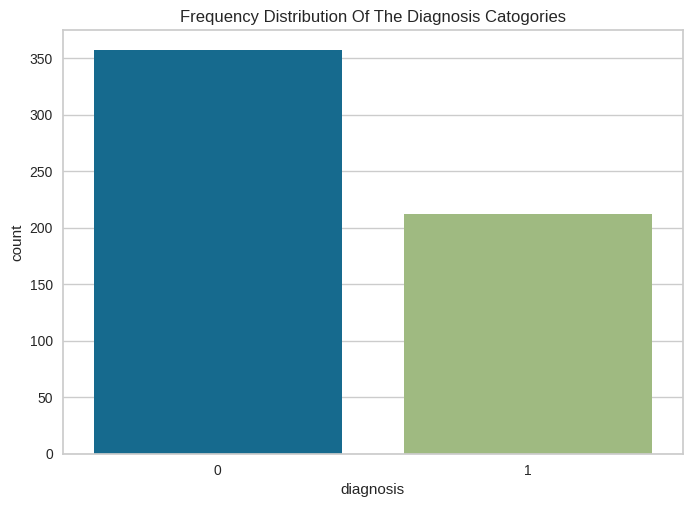

In [16]:
## lets plot the frequency distribution of diagnosis type 
sns.countplot(x="diagnosis", data=df)

plt.title("Frequency Distribution Of The Diagnosis Catogories")


plt.show()

<AxesSubplot: xlabel='diagnosis', ylabel='radius_mean'>

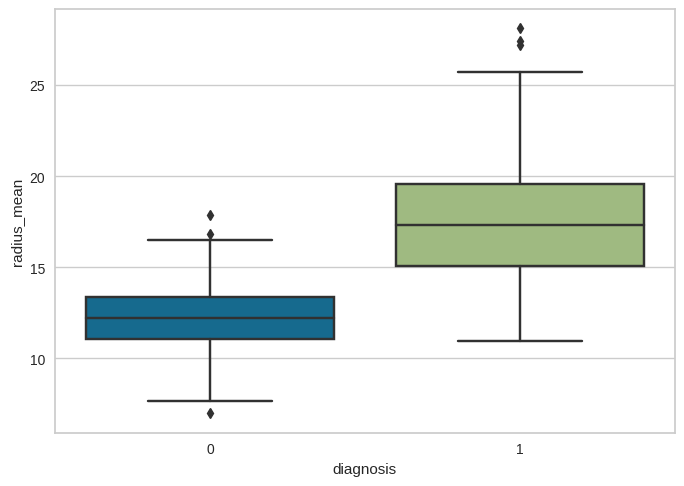

In [17]:
## lets plot the distribution of diagnosis with respect to radius mean
sns.boxplot(x = df['diagnosis'], y = df['radius_mean'])

<AxesSubplot: xlabel='diagnosis', ylabel='texture_mean'>

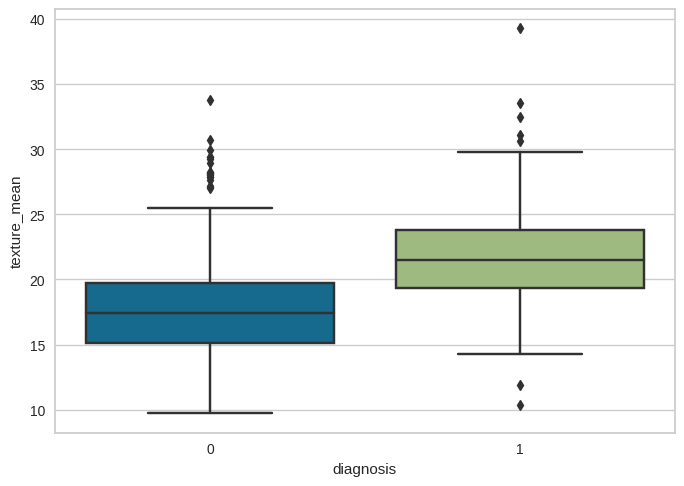

In [18]:
sns.boxplot(x = df['diagnosis'], y = df['texture_mean'])

<AxesSubplot: xlabel='diagnosis', ylabel='perimeter_mean'>

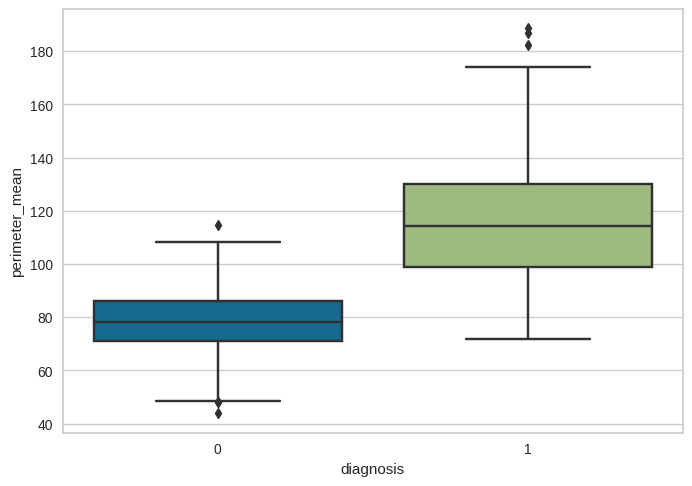

In [19]:
sns.boxplot(x = df['diagnosis'], y = df['perimeter_mean'])

In [20]:
## correlation analysis
numerical_cols = df.select_dtypes(exclude=[object])

In [21]:
corr_matrix = numerical_cols.corr()
corr_matrix

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


## Further Data Preprocessing

- Missing value treatment
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Standardize Features
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

### checking for missing data


### Outlier detection
outliers are observations that are far away from the other data points in a random sample of a population. 

<AxesSubplot: ylabel='concave points_worst'>

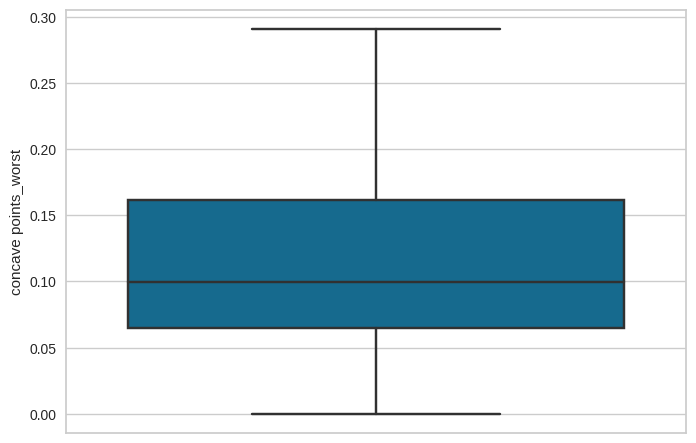

In [22]:
sns.boxplot(y=df["concave points_worst"])

<AxesSubplot: ylabel='concavity_worst'>

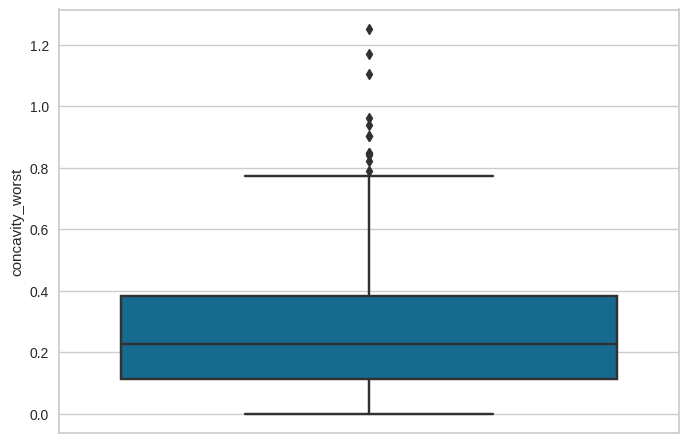

In [23]:
sns.boxplot(y=df["concavity_worst"])

<AxesSubplot: ylabel='area_worst'>

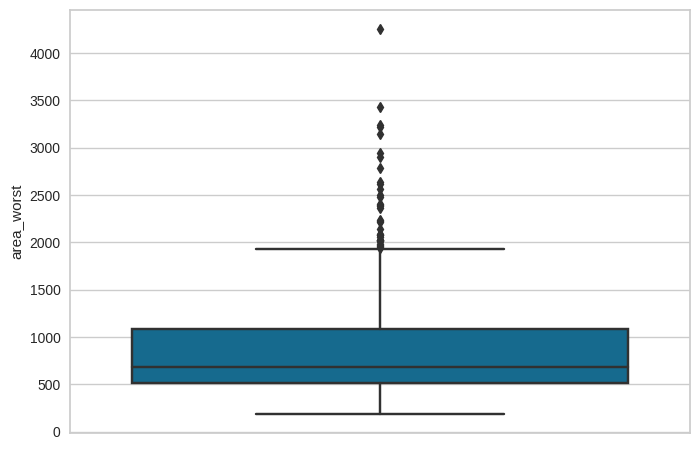

In [24]:
sns.boxplot(y=df["area_worst"])

<AxesSubplot: ylabel='perimeter_worst'>

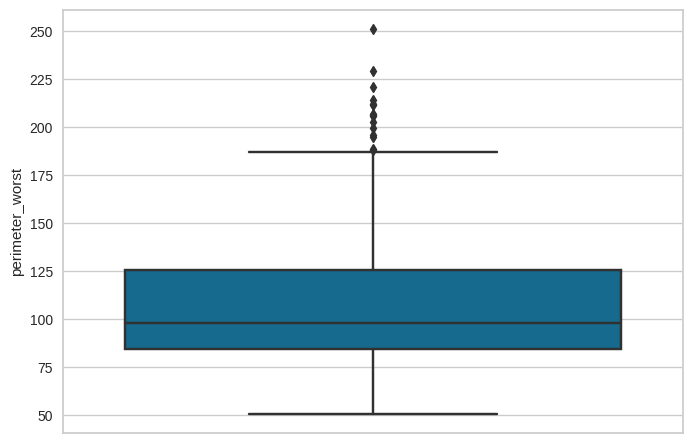

In [25]:
sns.boxplot(y=df["perimeter_worst"])

<AxesSubplot: ylabel='radius_worst'>

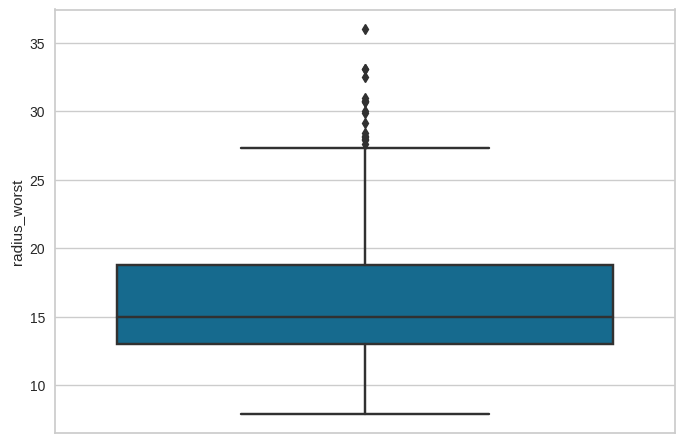

In [26]:
sns.boxplot(y=df["radius_worst"])

<AxesSubplot: ylabel='perimeter_se'>

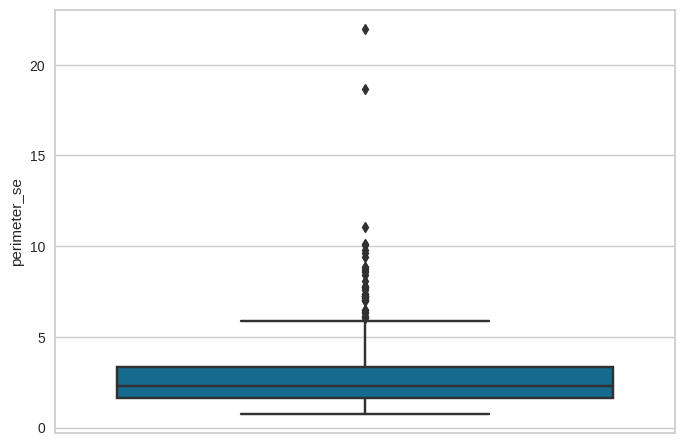

In [27]:
sns.boxplot(y=df["perimeter_se"])

### Validation framework
This involes splitting our dataset into the following rations
- 20% of data goes to validation
- 20% of data goes to test data
- 60 of the remaining data as train set

In [28]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_valid = train_test_split(df_train_full, test_size=0.25, random_state=11)

print(f"Size Of The Full Training Dataset: {len(df_train_full)}")
print(f"Size of The Training Dataset: {len(df_train)}")
print(f"Size Of The Validation Dataset: {len(df_valid)}")
print(f"Size Of The Test Dataset: {len(df_test)}")

Size Of The Full Training Dataset: 455
Size of The Training Dataset: 341
Size Of The Validation Dataset: 114
Size Of The Test Dataset: 114


#### Selecting Target Variable From Splitted Dataframe

In [29]:
y_train = df_train['diagnosis']
y_valid = df_valid['diagnosis']
y_test = df_test['diagnosis']

#### Delete Target Variable From Splitted Dataframe

In [30]:
del df_train['diagnosis']
del df_valid['diagnosis']
del df_test['diagnosis']

### Creating Standard Features

In [33]:
## create an instance of StandardScaler
stdsc = StandardScaler()

#df_train_std = stdsc.fit_transform(df_train)

#df_test_std = stdsc.transform(df_test)

## Training Classification Model

### Train Baseline Model 
- Select a few features , scale the feautes, and start with the trianing of a logistics regression model

In [37]:
base_features = ['radius_mean', 'perimeter_mean', 'texture_mean', 'area_mean', 'compactness_mean']

df_train_bl = df_train[base_features]
df_valid_bl = df_valid[base_features]

stdsc = StandardScaler()

X_train_bl = stdsc.fit_transform(df_train_bl)
X_valid_bl = stdsc.transform(df_valid_bl)

In [41]:
## instantiating the model
clf_model = LogisticRegression()

## training model
clf_model.fit(X_train_bl, y_train)

LogisticRegression()

In [47]:
## generating prediction
y_train_pred = clf_model.predict(X_train_bl)
y_valid_pred = clf_model.predict(X_valid_bl)

In [49]:
## computing the accuracy score
bl_train_acc_score = accuracy_score(y_train, y_train_pred)
bl_valid_acc_score = accuracy_score(y_valid, y_valid_pred)


In [50]:
print(f"Baseline Training Accuracy Score: {bl_train_acc_score}")
print(f"Baseline Valid Accuracy Score: {bl_valid_acc_score}")

Baseline Training Accuracy Score: 0.9149560117302052
Baseline Valid Accuracy Score: 0.8947368421052632
